# 1.0 Data

## 1.1 import libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
import PIL
import cv2


## 1.2 Load Data

In [11]:
image_direc = Path('../input/braille-character-dataset/Braille Dataset/Braille Dataset')

In [12]:
# get all .jpg in directory
directory_list = list(image_direc.glob('*.jpg'))

In [13]:
# get count of data
image_count = len(directory_list)
image_count

1560

In [15]:
# Creating a list to hold the names of the braille characters in each image
# Note: In this dataset, the names of the images correspond to the braille character they contain, 
#      so we can extract the name by taking the first character of the image filename.
names_list = []
for i in directory_list:
    names_list.append(os.path.basename(i)[0])

In [16]:
# Reads each image in the directory_list and appends it to the images list
images = []
for dir in directory_list:
    I = cv2.imread(str(dir))
    images.append(I)

In [18]:
# Converting Python lists to numpy arrays for easier manipulation
images_list = np.array(images)
name_list = np.array(name_list).T #transposing - converts columns into rows

In [19]:
# Use LabelEncoder to encode names into integers
le = LabelEncoder()
name_list = le.fit_transform(name_list)

# Normalize the image pixel values to be between 0 and 1
images_list = images_list / 255.0 
# Print the pixel values of the first image in the images_list
print(images_list[0])

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.97647059 0.97647059 0.97647059]
  [0.98431373 0.98431373 0.98431373]
  [0.99607843 0.99607843 0.99607843]]

 [[0.98431373 0.98431373 0.98431373]
  [0.99215686 0.99215686 0.99215686]
  [1.         1.         1.        ]
  ...
  [0.98039216 0.98039216 0.98039216]
  [0.98823529 0.98823529 0.98823529]
  [0.99607843 0.99607843 0.99607843]]

 [[0.97254902 0.97254902 0.97254902]
  [0.98039216 0.98039216 0.98039216]
  [0.98823529 0.98823529 0.98823529]
  ...
  [0.98431373 0.98431373 0.98431373]
  [0.99215686 0.99215686 0.99215686]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.98431373 0.98431373 0.98431373]
  [0.98039216 0.98039216 0.98039216]
  [0.97647059 0.97647059 0.97647059]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]


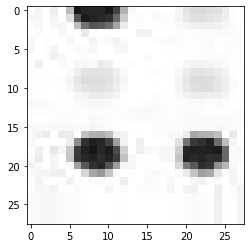

In [20]:
plt.imshow(images_list[1])

## 1.3 split data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(images_list, name_list, test_size=0.2, random_state=42)

Creating model: Trial 1: Adam Optimizer

## 2 Model training

>>SAME padding is a technique used in convolutional neural networks to ensure that the output size of a convolution operation is the same as the input size. It works by adding padding to the input image so that it is fully covered by the filter and the specified stride. The padding size is chosen in such a way that it ensures the output size is the same as the input size. This technique is called "SAME" because for stride 1, the output size is the same as the input size. By using SAME padding, we can ensure that the information at the edges of the image is not lost during the convolution operation.





In [66]:
'''creating a sequential model using keras
the model consists of convolutional layers, max pooling, dropout, batch normalization, flatten, and dense layers
with a softmax activation function in the output layer'''

# Load the model
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    
    keras.layers.Dense(units=576, activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(units=288, activation="relu"),
    keras.layers.Dense(units=26, activation="softmax") #output layer
])

# save model
# model.load_weights('weights.h5')


In [68]:
model.compile(optimizer="RMSprop", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

>>This line of code above compiles the model and sets the optimizer to Adam, loss function to Sparse Categorical Crossentropy and the metric to Sparse Categorical Accuracy. Sparse Categorical Crossentropy is used when the target variable is in integer format, while Categorical Crossentropy is used when the target variable is one-hot encoded. Sparse Categorical Accuracy calculates the accuracy of multi-class classification models with integer labels.

In [69]:
from keras.callbacks import EarlyStopping

In [70]:
es1 = EarlyStopping(patience=20, monitor="val_sparse_categorical_accuracy", mode="auto")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")
#The neural network will stop trainning if after 20 epochs, there is no improvement


history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    callbacks=[es1, es2])

Epoch 1/100
28/28 [==============================] - 3s 53ms/step - loss: 2.9706 - sparse_categorical_accuracy: 0.1730 - val_loss: 3.3086 - val_sparse_categorical_accuracy: 0.0480
Epoch 2/100
28/28 [==============================] - 1s 46ms/step - loss: 1.7730 - sparse_categorical_accuracy: 0.4914 - val_loss: 3.8416 - val_sparse_categorical_accuracy: 0.0347
Epoch 3/100
28/28 [==============================] - 2s 64ms/step - loss: 1.2565 - sparse_categorical_accuracy: 0.6380 - val_loss: 5.3236 - val_sparse_categorical_accuracy: 0.0347
Epoch 4/100
28/28 [==============================] - 1s 46ms/step - loss: 1.0703 - sparse_categorical_accuracy: 0.6816 - val_loss: 5.9362 - val_sparse_categorical_accuracy: 0.0347
Epoch 5/100
28/28 [==============================] - 1s 46ms/step - loss: 0.8275 - sparse_categorical_accuracy: 0.7205 - val_loss: 8.1196 - val_sparse_categorical_accuracy: 0.0347
Epoch 6/100
28/28 [==============================] - 1s 48ms/step - loss: 0.6425 - sparse_categorica

# 3.0 Model evaluation

In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 7, 7, 64)         

In [72]:
time = np.arange(1, len(history.history['loss'])+1)

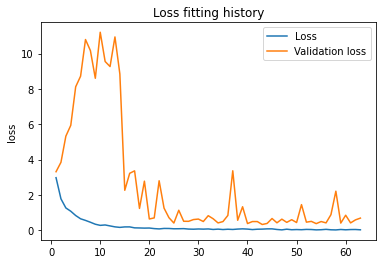

In [73]:
sns.lineplot(data=history.history, x=time, y='loss')
sns.lineplot(data=history.history, x=time, y='val_loss')
plt.title('Loss fitting history')
plt.legend(labels=['Loss', 'Validation loss'])
plt.show()

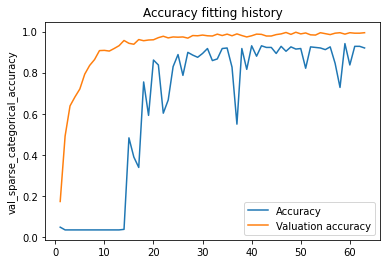

In [74]:
sns.lineplot(data=history.history, x=time, y='val_sparse_categorical_accuracy')
sns.lineplot(data=history.history, x=time, y='sparse_categorical_accuracy')
plt.title('Accuracy fitting history')
plt.legend(labels=['Accuracy', 'Valuation accuracy'])
plt.show()

In [75]:
print("RMSProp")
model.evaluate(X_test, y_test)

RMSProp
10/10 [==============================] - 0s 15ms/step - loss: 0.6342 - sparse_categorical_accuracy: 0.9038


[0.6341760158538818, 0.9038461446762085]

# Testing the Model

In [120]:
from tensorflow.keras.preprocessing import image
img=image.load_img('/kaggle/input/braille-character-dataset/Braille Dataset/Braille Dataset/a1.JPG0dim.jpg')

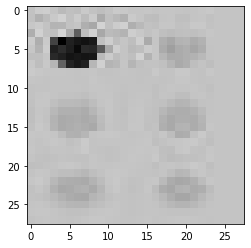

In [89]:
plt.imshow(img)

In [96]:
import cv2
import numpy as np
from tensorflow import keras

# Load the model
# model = keras.models.load_model('my_model.h5')

# Load the image and preprocess it
img = cv2.imread('/kaggle/input/braille-character-dataset/Braille Dataset/Braille Dataset/a1.JPG0dim.jpg')

img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.merge((img,)*3) # convert grayscale to 3-channel
img = img.reshape(1, 28, 28, 3)
img = img.astype('float32') / 255.0

# Make a prediction
pred = model.predict(img)


In [97]:
# Get the index of the predicted class
pred_class = np.argmax(pred, axis=1)
# Print the predicted class
print('Predicted class:', pred_class)

Predicted class: [0]


In [117]:
alphabet_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

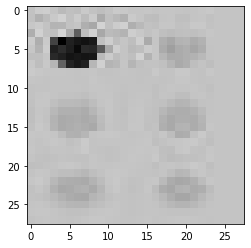

In [121]:
plt.imshow(img)

In [118]:
for i, idx in enumerate(alphabet_list):
#     print(i)
    if i == pred_class[0]:
        print('The braille character corresponds to the alphabet:', '"',idx,'"')
    else:
        print('Not available')


The braille character corresponds to the alphabet: " A "
